In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
location = 'C:\\Users\\raymondk\\Desktop\\Study\\Python\\Python for Data Science and Machine Learning Bootcamp\\Course Notes\\Refactored_Py_DS_ML_Bootcamp-master\\14-K-Nearest-Neighbors\\Classified Data.csv'

In [4]:
df = pd.DataFrame(pd.read_csv(location,index_col=0))

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


**Because KNN uses the distance between the nearest values the scale is important. 
Using Standard Scaler from sklearn data can be standarized.**

In [10]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1)

In [16]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**We now have the values of the feature columns as at a standard scale**

Creating a new data frame that will represent the scaled values

In [22]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Now the data is ready to be used in a algorithm
# Training the model

In [26]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [69]:
prediction = knn.predict(X_test)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [38]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# With the n_neigbhbors value of 1 it can be seen that we have 92% precision with the model. 
## Using the elbo method we can create a array of error values for differnt n_neigbhours values that can be visually represented to help us better chose a n_neighbors value for the model.

In [76]:
#Creating empty list to store error rates
error_rate = []
#Creating a for loop to use a range 1 to 40 as the n_neighbors values and create predictions for each value of i
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
#appending the mean value where the predicted value was not equal to the actual values(mean of the error)
    error_rate.append(np.mean(pred_i != y_test))

In [71]:
#Displaying the first 5 error values in the error_rate list
error_rate[:5]

[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664]

# Ploting the error rates

Text(0, 0.5, 'Error Rate')

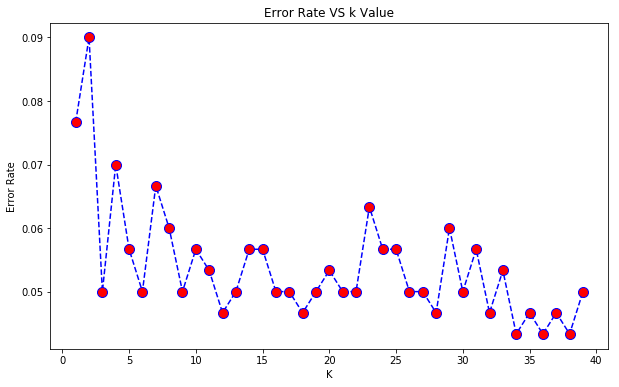

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate VS k Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Looking at the plot above it can be seen the optimal k value is around 17**

# Re-Training the model now with a higher k Value

In [82]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [81]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[154   5]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

